In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as m

from sklearn import linear_model, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, TimeSeriesSplit, \
                                    cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_C2H6 = pd.read_csv('train_data_C2H6.csv', header = 0, sep = ',')
train_C3H8 = pd.read_csv('train_data_C3H8.csv', header = 0, sep = ',')
train_iC4H10 = pd.read_csv('train_data_iC4H10.csv', header = 0, sep = ',')
train_nC4H10 = pd.read_csv('train_data_nC4H10.csv', header = 0, sep = ',')

In [4]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [5]:
train_C2H6

,B_rate,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,Cx_A_C2H6**2,Pe_ef_C2H6,Pe_ef_C3H8,G_B_C2H6
0,71.792506,3.290427,27.842527,12.387785,17.282650,400285.363153,-0.489581,-2.242475,0.181389,0.840950,0.239689,-0.118019,-0.547486,3.287050
1,71.939558,3.359382,26.894371,12.322429,17.445244,399799.094868,-0.003377,-0.194786,-0.044183,0.121399,0.000011,0.000047,-0.010594,3.340066
2,72.124690,3.705238,28.255982,12.149973,16.882631,410055.101480,-0.019316,1.251283,0.124272,-0.027603,0.000373,0.000306,0.255575,3.281556
3,72.278288,3.866684,29.575965,12.056512,16.432037,416101.617450,-0.423683,-0.670212,0.196535,0.459082,0.179507,1.191363,0.111578,3.293440
4,72.454090,3.618825,29.382409,12.201836,16.604850,410432.313574,-0.573244,-2.120496,0.258850,0.865234,0.328608,-0.226459,-1.602460,3.289875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,74.183355,3.554647,25.749853,11.862763,17.512023,420161.649553,0.046943,-0.516086,-0.252523,0.529955,0.002204,-0.007505,-0.082965,3.573312
5794,74.213066,3.564293,25.779263,11.818925,17.298314,419302.650692,0.018665,0.614285,0.206822,0.863474,0.000348,0.006597,0.525263,3.705671
5795,74.144367,3.599126,26.036910,11.844345,17.235252,419684.555567,0.141378,0.987720,0.290982,1.054463,0.019988,0.075440,0.512999,3.782530
5796,74.320575,3.643365,26.260652,11.876124,17.218604,420010.019020,0.183404,0.858988,0.237820,1.026423,0.033637,0.098833,0.446453,3.872604


In [6]:
col_C2H6 = [i for i in train_C2H6.drop('G_B_C2H6',axis=1).columns]

In [7]:
X_C2H6 = train_C2H6.drop('G_B_C2H6',1)
y_C2H6 = train_C2H6['G_B_C2H6']

scaler_C2H6 = StandardScaler()
scaler_C2H6.fit(X_C2H6, y_C2H6)
X_scaled_C2H6 = scaler_C2H6.transform(X_C2H6)

In [8]:
train_C3H8

,B_rate,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,G_B_C3H8
0,71.792506,3.290427,27.842527,12.387785,17.282650,400285.363153,-0.489581,-2.242475,5.028694,0.032902,0.707197,-0.118019,27.647742
1,71.939558,3.359382,26.894371,12.322429,17.445244,399799.094868,-0.003377,-0.194786,0.037941,0.001952,0.014738,0.000047,28.145653
2,72.124690,3.705238,28.255982,12.149973,16.882631,410055.101480,-0.019316,1.251283,1.565708,0.015444,0.000762,0.000306,27.585770
3,72.278288,3.866684,29.575965,12.056512,16.432037,416101.617450,-0.423683,-0.670212,0.449184,0.038626,0.210757,1.191363,27.455469
4,72.454090,3.618825,29.382409,12.201836,16.604850,410432.313574,-0.573244,-2.120496,4.496504,0.067003,0.748631,-0.226459,27.346160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,74.183355,3.554647,25.749853,11.862763,17.512023,420161.649553,0.046943,-0.516086,0.266344,0.063768,0.280852,-0.007505,26.364138
5794,74.213066,3.564293,25.779263,11.818925,17.298314,419302.650692,0.018665,0.614285,0.377347,0.042775,0.745587,0.006597,26.766983
5795,74.144367,3.599126,26.036910,11.844345,17.235252,419684.555567,0.141378,0.987720,0.975590,0.084671,1.111892,0.075440,26.895899
5796,74.320575,3.643365,26.260652,11.876124,17.218604,420010.019020,0.183404,0.858988,0.737861,0.056559,1.053544,0.098833,27.404164


In [9]:
col_C3H8 = [i for i in train_C3H8.drop('G_B_C3H8',axis=1).columns]

In [10]:
X_C3H8 = train_C3H8.drop('G_B_C3H8',1)
y_C3H8 = train_C3H8['G_B_C3H8']

scaler_C3H8 = StandardScaler()
scaler_C3H8.fit(X_C3H8, y_C3H8)
X_scaled_C3H8 = scaler_C3H8.transform(X_C3H8)

In [11]:
train_iC4H10

,B_rate,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,G_B_iC4H10
0,71.792506,3.290427,27.842527,12.387785,17.282650,400285.363153,-0.489581,-2.242475,5.028694,0.032902,0.707197,-0.118019,12.343602
1,71.939558,3.359382,26.894371,12.322429,17.445244,399799.094868,-0.003377,-0.194786,0.037941,0.001952,0.014738,0.000047,12.446701
2,72.124690,3.705238,28.255982,12.149973,16.882631,410055.101480,-0.019316,1.251283,1.565708,0.015444,0.000762,0.000306,12.346508
3,72.278288,3.866684,29.575965,12.056512,16.432037,416101.617450,-0.423683,-0.670212,0.449184,0.038626,0.210757,1.191363,12.315361
4,72.454090,3.618825,29.382409,12.201836,16.604850,410432.313574,-0.573244,-2.120496,4.496504,0.067003,0.748631,-0.226459,12.281888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,74.183355,3.554647,25.749853,11.862763,17.512023,420161.649553,0.046943,-0.516086,0.266344,0.063768,0.280852,-0.007505,12.069585
5794,74.213066,3.564293,25.779263,11.818925,17.298314,419302.650692,0.018665,0.614285,0.377347,0.042775,0.745587,0.006597,12.109907
5795,74.144367,3.599126,26.036910,11.844345,17.235252,419684.555567,0.141378,0.987720,0.975590,0.084671,1.111892,0.075440,12.082166
5796,74.320575,3.643365,26.260652,11.876124,17.218604,420010.019020,0.183404,0.858988,0.737861,0.056559,1.053544,0.098833,12.141276


In [12]:
col_iC4H10 = [i for i in train_iC4H10.drop('G_B_iC4H10',axis=1).columns]

In [13]:
X_iC4H10 = train_iC4H10.drop('G_B_iC4H10',1)
y_iC4H10 = train_iC4H10['G_B_iC4H10']

scaler_iC4H10 = StandardScaler()
scaler_iC4H10.fit(X_iC4H10, y_iC4H10)
X_scaled_iC4H10 = scaler_iC4H10.transform(X_iC4H10)

In [14]:
train_nC4H10

,B_rate,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,Re_A,Cx_A_C2H6,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,G_B_nC4H10
0,71.792506,3.290427,27.842527,12.387785,17.282650,400285.363153,-0.489581,5.028694,0.032902,0.707197,-0.118019,17.404049
1,71.939558,3.359382,26.894371,12.322429,17.445244,399799.094868,-0.003377,0.037941,0.001952,0.014738,0.000047,17.417641
2,72.124690,3.705238,28.255982,12.149973,16.882631,410055.101480,-0.019316,1.565708,0.015444,0.000762,0.000306,17.341714
3,72.278288,3.866684,29.575965,12.056512,16.432037,416101.617450,-0.423683,0.449184,0.038626,0.210757,1.191363,17.297271
4,72.454090,3.618825,29.382409,12.201836,16.604850,410432.313574,-0.573244,4.496504,0.067003,0.748631,-0.226459,17.241454
...,...,...,...,...,...,...,...,...,...,...,...,...
5793,74.183355,3.554647,25.749853,11.862763,17.512023,420161.649553,0.046943,0.266344,0.063768,0.280852,-0.007505,18.375497
5794,74.213066,3.564293,25.779263,11.818925,17.298314,419302.650692,0.018665,0.377347,0.042775,0.745587,0.006597,18.352777
5795,74.144367,3.599126,26.036910,11.844345,17.235252,419684.555567,0.141378,0.975590,0.084671,1.111892,0.075440,18.261675
5796,74.320575,3.643365,26.260652,11.876124,17.218604,420010.019020,0.183404,0.737861,0.056559,1.053544,0.098833,18.162638


In [15]:
col_nC4H10 = [i for i in train_nC4H10.drop('G_B_nC4H10', axis=1).columns]

In [16]:
X_nC4H10 = train_nC4H10.drop('G_B_nC4H10',1)
y_nC4H10 = train_nC4H10['G_B_nC4H10']

scaler_nC4H10 = StandardScaler()
scaler_nC4H10.fit(X_nC4H10, y_nC4H10)
X_scaled_nC4H10 = scaler_nC4H10.transform(X_nC4H10)

## Кросс валидация

Обучение / тест

In [17]:
X_train_C2H6, X_test_C2H6, y_train_C2H6, y_test_C2H6 = train_test_split(
    X_scaled_C2H6, y_C2H6, test_size=0.2, shuffle=False, random_state=0)

In [18]:
X_train_C3H8, X_test_C3H8, y_train_C3H8, y_test_C3H8 = train_test_split(
    X_scaled_C3H8, y_C3H8, test_size=0.2, shuffle=False, random_state=0)

In [19]:
X_train_iC4H10, X_test_iC4H10, y_train_iC4H10, y_test_iC4H10 = train_test_split(
    X_scaled_iC4H10, y_iC4H10, test_size=0.2, shuffle=False, random_state=0)

In [20]:
X_train_nC4H10, X_test_nC4H10, y_train_nC4H10, y_test_nC4H10 = train_test_split(
    X_scaled_nC4H10, y_nC4H10, test_size=0.2, shuffle=False, random_state=0)

Стратегии кросс-валидации

In [21]:
cv_strategy_KFold = KFold(n_splits=5, random_state=0, shuffle=False)
cv_strategy_TMS = TimeSeriesSplit(n_splits=5)

Загружаем метрику качества

In [22]:
scorer = metrics.make_scorer(metrics.mean_absolute_error)
scorerCV = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=False)

# linear_regressor

### C2H6

In [23]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = linear_regressor.predict(X_test_C2H6)

In [24]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.43777381692685746

In [25]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.08247218731905977, max:0.10136821135202351, min:0.07156300117814732, std:0.01007428634493286


In [26]:
lr_scoring

array([0.07949825, 0.071563  , 0.08219926, 0.07773221, 0.10136821])

In [27]:
lr_scoring = cross_val_score(linear_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.11193753249761021, max:0.1922520726324069, min:0.08046740059266214, std:0.04068963878233278


In [28]:
lr_scoring

array([0.19225207, 0.09179311, 0.0804674 , 0.09444138, 0.1007337 ])

### C3H8

In [29]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = linear_regressor.predict(X_test_C3H8)

In [30]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.0077616928121471

In [31]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.8491477969821352, max:1.7586572881077385, min:0.4539889615531739, std:0.47486186035968597


In [32]:
lr_scoring

array([0.49771529, 1.75865729, 0.82824838, 0.45398896, 0.70712906])

In [33]:
lr_scoring = cross_val_score(linear_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:1.075477084900705, max:1.7276296956968926, min:0.5668769980743154, std:0.5208539860150664


In [34]:
lr_scoring

array([1.68565604, 1.7276297 , 0.566877  , 0.78831467, 0.60890802])

### iC4H10

In [35]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = linear_regressor.predict(X_test_iC4H10)

In [36]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.7679702431488283

In [37]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.42462220158821895, max:1.1322085426816846, min:0.19330655183847878, std:0.35786295105605825


In [38]:
lr_scoring

array([0.19330655, 1.13220854, 0.23259377, 0.21589646, 0.34910569])

In [39]:
lr_scoring = cross_val_score(linear_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.4673464354933693, max:1.1475506798113244, min:0.1924151392447558, std:0.3445783377096129


In [40]:
lr_scoring

array([1.14755068, 0.31274826, 0.19241514, 0.33542856, 0.34858954])

### nC4H10

In [41]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = linear_regressor.predict(X_test_nC4H10)

In [42]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.1044235013026027

In [43]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (KFold) mean:0.5893662058240186, max:1.6216305469246581, min:0.27912206048360394, std:0.5171697168632327


In [44]:
lr_scoring

array([0.33333553, 1.62163055, 0.38260746, 0.27912206, 0.33013543])

In [45]:
lr_scoring = cross_val_score(linear_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring .mean(), lr_scoring .max(), 
                                                     lr_scoring .min(), lr_scoring .std()))

LR (TMS) mean:0.6952369579274722, max:1.8262203207340864, min:0.24537706923733157, std:0.5809303020528799


In [46]:
lr_scoring

array([1.82622032, 0.65149608, 0.39729704, 0.24537707, 0.35579428])

# lasso_regressor

### C2H6

In [47]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = lasso_regressor.predict(X_test_C2H6)

In [48]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.176936189876648

In [49]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:0.7548542358300381, max:1.3910589856181597, min:0.3290674656270142, std:0.4045316446357306


In [50]:
ls_scoring

array([1.39105899, 1.06408544, 0.52274992, 0.46730937, 0.32906747])

In [51]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [52]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [53]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [54]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 471 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [55]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=0.001)

In [56]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6954641266354725
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [57]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.0594636899341894

In [58]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [59]:
%%time
grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 443 ms


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [60]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=0.001)

In [61]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-0.6498689733340515
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [62]:
predictions = grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

2.0594636899341894

### C3H8

In [63]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = lasso_regressor.predict(X_test_C3H8)

In [64]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.7881853319343988

In [65]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:2.9186375363280934, max:10.41343476034624, min:0.5040608031354223, std:3.7617954413573322


In [66]:
ls_scoring

array([ 1.16900767, 10.41343476,  1.52328376,  0.5040608 ,  0.98340069])

In [67]:
ls_scoring = cross_val_score(lasso_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:2.733591281741309, max:7.890202210638993, min:0.6232097494739686, std:2.8093862233093354


In [68]:
ls_scoring

array([7.89020221, 3.60241415, 0.62320975, 0.76515634, 0.78697396])

In [69]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [70]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [71]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [72]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 451 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [73]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=0.001)

In [74]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.305251927373404
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [75]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.8370541037595158

In [76]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [77]:
%%time
grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 508 ms


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [78]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=0.001)

In [79]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-2.7221112114282366
{'alpha': 0.5, 'max_iter': 500, 'tol': 0.001}


In [80]:
predictions = grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.8370541037595158

### iC4H10

In [81]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = lasso_regressor.predict(X_test_iC4H10)

In [82]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.9820564038479644

In [83]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.3070235051019605, max:4.647798328382112, min:0.3482295887720917, std:1.6726379895653778


In [84]:
ls_scoring

array([0.56653928, 4.64779833, 0.5667564 , 0.34822959, 0.40579392])

In [85]:
ls_scoring = cross_val_score(lasso_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.2292719428913124, max:2.9535272181932224, min:0.266779844121818, std:1.1167448610119446


In [86]:
ls_scoring

array([2.95352722, 2.16831776, 0.31575858, 0.26677984, 0.44197631])

In [87]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [88]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [89]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [90]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 426 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [91]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=1e-05)

In [92]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.1932322319457909
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [93]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8822554513936673

In [94]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [95]:
%%time
grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 483 ms


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [96]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=1e-05)

In [97]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.1379734600491749
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [98]:
predictions = grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8822554513936673

### nC4H10

In [99]:
lasso_regressor = linear_model.Lasso(random_state=0)
lasso_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = lasso_regressor.predict(X_test_nC4H10)

In [100]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.3745216576066601

In [101]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('LR (KFold)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (KFold)) mean:1.624191742596836, max:6.4921607064025695, min:0.3344547676296441, std:2.4342965099125977


In [102]:
ls_scoring

array([0.44921497, 6.49216071, 0.42830698, 0.33445477, 0.41682129])

In [103]:
ls_scoring = cross_val_score(lasso_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('LR (TMS)) mean:{}, max:{}, min:{}, std:{}'.format(ls_scoring .mean(), ls_scoring .max(), 
                                                     ls_scoring .min(), ls_scoring .std()))

LR (TMS)) mean:1.5770718353015756, max:3.9772803519809203, min:0.2866511829812899, std:1.5453059281831258


In [104]:
ls_scoring

array([3.97728035, 2.85929721, 0.31511032, 0.28665118, 0.44702011])

In [105]:
lasso_regressor.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [106]:
parameters_grid = {
    'alpha' : [0.5, 1, 1.5, 2],
    'tol' : [0.00001, 0.0001, 0.001],
    'max_iter': [500, 1000, 2000],
}

In [107]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_KFold)

In [108]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 411 ms


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [109]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=1e-05)

In [110]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.5520558401322289
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [111]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.2330656278502725

In [112]:
grid_cv = GridSearchCV(lasso_regressor, parameters_grid, scoring = scorerCV, cv = cv_strategy_TMS)

In [113]:
%%time
grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 469 ms


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             estimator=Lasso(random_state=0),
             param_grid={'alpha': [0.5, 1, 1.5, 2],
                         'max_iter': [500, 1000, 2000],
                         'tol': [1e-05, 0.0001, 0.001]},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [114]:
grid_cv.best_estimator_

Lasso(alpha=0.5, max_iter=500, random_state=0, tol=1e-05)

In [115]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1.499862006993754
{'alpha': 0.5, 'max_iter': 500, 'tol': 1e-05}


In [116]:
predictions = grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.2330656278502725

# SGDRegressor

### C2H6

In [117]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C2H6, y_train_C2H6)
predictions = SGD_regressor.predict(X_test_C2H6)

In [118]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

0.9677504162076914

In [119]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.21041760362773448, max:0.2702403527888308, min:0.1706898558843344, std:0.039293289390521666


In [120]:
SGD_scoring

array([0.17068986, 0.17430815, 0.24220122, 0.27024035, 0.19464844])

In [121]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:1.5829372658518164, max:4.475959524558667, min:0.21422160466889092, std:1.7357058144093607


In [122]:
SGD_scoring

array([4.47595952, 2.71698567, 0.23229393, 0.2752256 , 0.2142216 ])

In [123]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [124]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [125]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [126]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 4.85 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [127]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, penalty='l1', random_state=0, shuffle=False, tol=1)

In [128]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.2925254937091865
{'tol': 1, 'power_t': 0.25, 'penalty': 'l1', 'eta0': 0.01, 'alpha': 0.001}


In [129]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

1.6537002909162073

In [130]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [131]:
%%time
randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

Wall time: 3.8 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [132]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, penalty='l1', power_t=0.3, random_state=0,
             shuffle=False, tol=1.5)

In [133]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-1.3911091142187666
{'tol': 1.5, 'power_t': 0.3, 'penalty': 'l1', 'eta0': 0.01, 'alpha': 0.001}


In [134]:
predictions = randomized_grid_cv.predict(X_test_C2H6)
metrics.mean_absolute_error(y_test_C2H6, predictions)

1.80467435287886

### C3H8

In [135]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_C3H8, y_train_C3H8)
predictions = SGD_regressor.predict(X_test_C3H8)

In [136]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.4555663556421197

In [137]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.8957537693430442, max:1.1897944077028249, min:0.4658093291379325, std:0.254103962323851


In [138]:
SGD_scoring

array([0.93780441, 1.18979441, 1.09327838, 0.46580933, 0.79208232])

In [139]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:5.660250230291384, max:25.263014144928604, min:0.5633961790492701, std:9.803716202400302


In [140]:
SGD_scoring

array([25.26301414,  1.16667412,  0.56339618,  0.68830847,  0.61985823])

In [141]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [142]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [143]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [144]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 6.12 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [145]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.005, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5)

In [146]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.829091532355338
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.005, 'alpha': 0.001}


In [147]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.6014366892748666

In [148]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV, 
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [149]:
%%time
randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

Wall time: 4.62 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [150]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, power_t=0.2, random_state=0, shuffle=False,
             tol=1)

In [151]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-6.8882178625801345
{'tol': 1, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [152]:
predictions = randomized_grid_cv.predict(X_test_C3H8)
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.4155507742807667

### iC4H10

In [153]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_iC4H10, y_train_iC4H10)
predictions = SGD_regressor.predict(X_test_iC4H10)

In [154]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8412391736472007

In [155]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.289233335531043, max:0.49224430177921263, min:0.20749588771741248, std:0.10602519886525923


In [156]:
SGD_scoring

array([0.21119153, 0.4922443 , 0.20749589, 0.24224783, 0.29298712])

In [157]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:3.084493290264632, max:14.311951628647998, min:0.2061591855708096, std:5.614061091799582


In [158]:
SGD_scoring

array([14.31195163,  0.37676725,  0.20615919,  0.2230839 ,  0.30450449])

In [159]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [160]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [161]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [162]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 5.37 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [163]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=0.5)

In [164]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.24711415971053424
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.001}


In [165]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.6932348469795612

In [166]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [167]:
%%time
randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

Wall time: 4.08 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [168]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, power_t=0.2, random_state=0, shuffle=False,
             tol=1)

In [169]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-3.2602276107182826
{'tol': 1, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [170]:
predictions = randomized_grid_cv.predict(X_test_iC4H10)
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.6806827831114335

### nC4H10

In [171]:
SGD_regressor = linear_model.SGDRegressor(shuffle=False, random_state=0)
#SGD_regressor = linear_model.SGDRegressor(shuffle=False,tol=1, power_t=0.25, penalty='l2', 
#                                          eta0= 0.005, alpha= 0.0015, random_state=0)
SGD_regressor.fit(X_train_nC4H10, y_train_nC4H10)
predictions = SGD_regressor.predict(X_test_nC4H10)

In [172]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.3345998267136503

In [173]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer , cv = cv_strategy_KFold)
print ('SGD (KFold) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (KFold) mean:0.4573780018813368, max:0.9856097572341156, min:0.29384843240572656, std:0.26463135079121175


In [174]:
SGD_scoring

array([0.29384843, 0.98560976, 0.34028701, 0.33111277, 0.33603204])

In [175]:
SGD_scoring = cross_val_score(SGD_regressor, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('SGD (TMS) mean:{}, max:{}, min:{}, std:{}'.format(SGD_scoring .mean(), SGD_scoring .max(), 
                                                     SGD_scoring .min(), SGD_scoring .std()))

SGD (TMS) mean:4.225568863765136, max:19.281892298776558, min:0.3314215773098593, std:7.530180436469805


In [176]:
SGD_scoring

array([19.2818923 ,  0.7985699 ,  0.3614171 ,  0.33142158,  0.35454345])

In [177]:
SGD_regressor.get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [178]:
parameters_grid = {
    'penalty' : ['l1', 'l2'],
    'alpha' : [0.00005, 0.0001, 0.001,0.0001],
    'eta0' : [0.001, 0.005, 0.01, 0.05],
     'tol' : [0.5,1, 1.5],
    'power_t' : [0.2,0.25, 0.3], 
    
}

In [179]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_KFold, n_iter = 200, random_state=0)

In [180]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 5.55 s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=False),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [181]:
randomized_grid_cv.best_estimator_

SGDRegressor(eta0=0.05, penalty='l1', power_t=0.2, random_state=0,
             shuffle=False, tol=1.5)

In [182]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-0.3597863105794849
{'tol': 1.5, 'power_t': 0.2, 'penalty': 'l1', 'eta0': 0.05, 'alpha': 0.0001}


In [183]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.9410063364771903

In [184]:
randomized_grid_cv = RandomizedSearchCV(SGD_regressor, parameters_grid, scoring = scorerCV,
                                        cv = cv_strategy_TMS, n_iter = 200, random_state=0)

In [185]:
%%time
randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

Wall time: 4.32 s


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
                   estimator=SGDRegressor(random_state=0, shuffle=False),
                   n_iter=200,
                   param_distributions={'alpha': [5e-05, 0.0001, 0.001, 0.0001],
                                        'eta0': [0.001, 0.005, 0.01, 0.05],
                                        'penalty': ['l1', 'l2'],
                                        'power_t': [0.2, 0.25, 0.3],
                                        'tol': [0.5, 1, 1.5]},
                   random_state=0,
                   scoring=make_scorer(mean_absolute_error, greater_is_better=False))

In [186]:
randomized_grid_cv.best_estimator_

SGDRegressor(alpha=0.001, eta0=0.05, power_t=0.2, random_state=0, shuffle=False,
             tol=0.5)

In [187]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

-4.619971234341042
{'tol': 0.5, 'power_t': 0.2, 'penalty': 'l2', 'eta0': 0.05, 'alpha': 0.001}


In [188]:
predictions = randomized_grid_cv.predict(X_test_nC4H10)
metrics.mean_absolute_error(y_test_nC4H10, predictions)

0.8582505255343713

# XGBoost

### C2H6

In [189]:
#import xgboost as xgb

# GradientBoostingRegressor

### C2H6

In [190]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C2H6, y_train_C2H6)
predictions = estimator.predict(X_test_C2H6)

In [191]:
metrics.mean_absolute_error(y_test_C2H6, predictions)

1.6284803918289745

In [192]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.20822678089523222, max:0.32957272486434336, min:0.0909478743301314, std:0.0938718455633578


In [193]:
GBR_scoring

array([0.09094787, 0.32957272, 0.22661102, 0.11042624, 0.28357604])

In [194]:
GBR_scoring = cross_val_score(estimator, X_train_C2H6, y_train_C2H6, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:0.4620403043484901, max:1.2531275252719007, min:0.10459624678331737, std:0.40975238197209096


In [195]:
GBR_scoring

array([1.25312753, 0.40321464, 0.19654414, 0.10459625, 0.35271897])

In [196]:
estimator.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [197]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [198]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [199]:
#%%time
#randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

In [200]:
#randomized_grid_cv.best_estimator_

In [201]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [202]:
#predictions = randomized_grid_cv.predict(X_test_C2H6)
#metrics.mean_absolute_error(y_test_C2H6, predictions)

In [203]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [204]:
#%%time
#randomized_grid_cv.fit(X_train_C2H6, y_train_C2H6)

In [205]:
#randomized_grid_cv.best_estimator_

In [206]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [207]:
#predictions = randomized_grid_cv.predict(X_test_C2H6)
#metrics.mean_absolute_error(y_test_C2H6, predictions)

### C3H8

In [208]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_C3H8, y_train_C3H8)
predictions = estimator.predict(X_test_C3H8)

In [209]:
metrics.mean_absolute_error(y_test_C3H8, predictions)

1.651740985553447

In [210]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:1.1213904659244762, max:2.8822794226159165, min:0.5295732970565084, std:0.8931112500290664


In [211]:
GBR_scoring

array([0.5295733 , 2.88227942, 0.94220549, 0.53922366, 0.71367046])

In [212]:
GBR_scoring = cross_val_score(estimator, X_train_C3H8, y_train_C3H8, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:2.064543028945384, max:6.0276482806000224, min:0.5658450940799554, std:2.0638760751524896


In [213]:
GBR_scoring

array([6.02764828, 2.16661362, 0.63673453, 0.92587363, 0.56584509])

In [214]:
estimator.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [215]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [216]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [217]:
#%%time
#randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

In [218]:
#randomized_grid_cv.best_estimator_

In [219]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [220]:
#predictions = randomized_grid_cv.predict(X_test_C3H8)
#metrics.mean_absolute_error(y_test_C3H8, predictions)

In [221]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [222]:
#%%time
#randomized_grid_cv.fit(X_train_C3H8, y_train_C3H8)

In [223]:
#randomized_grid_cv.best_estimator_

In [224]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [225]:
#predictions = randomized_grid_cv.predict(X_test_C3H8)
#metrics.mean_absolute_error(y_test_C3H8, predictions)

### iC4H10

In [226]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_iC4H10, y_train_iC4H10)
predictions = estimator.predict(X_test_iC4H10)

In [227]:
metrics.mean_absolute_error(y_test_iC4H10, predictions)

0.8507692305199864

In [228]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.42815961397764485, max:1.0233114623963588, min:0.19918890125828495, std:0.30207947498230586


In [229]:
GBR_scoring

array([0.1991889 , 1.02331146, 0.27614569, 0.27873982, 0.3634122 ])

In [230]:
GBR_scoring = cross_val_score(estimator, X_train_iC4H10, y_train_iC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:0.8421563417759342, max:2.2079886544461305, min:0.20102906259316738, std:0.7444098361718398


In [231]:
GBR_scoring

array([2.20798865, 1.0618158 , 0.20102906, 0.36640354, 0.37354465])

In [232]:
estimator.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [233]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [234]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [235]:
#%%time
#randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

In [236]:
#randomized_grid_cv.best_estimator_

In [237]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [238]:
#predictions = randomized_grid_cv.predict(X_test_iC4H10)
#metrics.mean_absolute_error(y_test_iC4H10, predictions)

In [239]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [240]:
#%%time
#randomized_grid_cv.fit(X_train_iC4H10, y_train_iC4H10)

In [241]:
#randomized_grid_cv.best_estimator_

In [242]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [243]:
#predictions = randomized_grid_cv.predict(X_test_iC4H10)
#metrics.mean_absolute_error(y_test_iC4H10, predictions)

### nC4H10

In [244]:
estimator = GradientBoostingRegressor(random_state=0)
estimator.fit(X_train_nC4H10, y_train_nC4H10)
predictions = estimator.predict(X_test_nC4H10)

In [245]:
metrics.mean_absolute_error(y_test_nC4H10, predictions)

1.221893572229808

In [246]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_KFold)
print ('GBR (KFold) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (KFold) mean:0.5676234503169699, max:1.508822634361073, min:0.25291121061627936, std:0.47315904630374955


In [247]:
GBR_scoring = cross_val_score(estimator, X_train_nC4H10, y_train_nC4H10, scoring = scorer, cv = cv_strategy_TMS)
print ('GBR (TMS) mean:{}, max:{}, min:{}, std:{}'.format(GBR_scoring .mean(), GBR_scoring .max(), 
                                                     GBR_scoring .min(), GBR_scoring .std()))

GBR (TMS) mean:1.159552269168899, max:3.1820728034536696, min:0.24413384649492625, std:1.1344588599126237


In [248]:
GBR_scoring

array([3.1820728 , 1.6460282 , 0.36284249, 0.24413385, 0.36268401])

In [249]:
estimator.get_params().keys()

dict_keys(['alpha', 'ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'presort', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [250]:
parameters_grid = {
    'n_estimators' : [50, 100, 200, 500],
    'max_depth' : [3, 5, 10, 15],
    
}

In [251]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer,
#                                        cv = cv_strategy_KFold, n_iter = 20, random_state = 0)

In [252]:
#%%time
#randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

In [253]:
#randomized_grid_cv.best_estimator_

In [254]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [255]:
#predictions = randomized_grid_cv.predict(X_test_nC4H10)
#metrics.mean_absolute_error(y_test_nC4H10, predictions)

In [256]:
#randomized_grid_cv = RandomizedSearchCV(estimator, parameters_grid, scoring = scorer, 
#                                        cv = cv_strategy_TMS, n_iter = 20, random_state = 0)

In [257]:
#%%time
#randomized_grid_cv.fit(X_train_nC4H10, y_train_nC4H10)

In [258]:
#randomized_grid_cv.best_estimator_

In [259]:
#print(randomized_grid_cv.best_score_)
#print(randomized_grid_cv.best_params_)

In [260]:
#predictions = randomized_grid_cv.predict(X_test_nC4H10)
#metrics.mean_absolute_error(y_test_nC4H10, predictions)

# Prediction

In [337]:
test_data = pd.read_csv('test_data.csv', header = 0, sep = ',')

In [338]:
test_data

,timestamp,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate,month,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,G_B_C2H6,G_B_C3H8,G_B_iC4H10,G_B_nC4H10,ro_mix_A,mu_mix_A,w_A,Re_A,A_rate**2,sqrt_A_rate,e**A_rate,lg_A_rate,ln_A_rate,B_rate**2,sqrt_B_rate,e**B_rate,Re_A**2,sqrt_Re_A,lg_Re_A,ln_Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,w_prev,Cx_A_C2H6**2,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,Pe_ef_C3H8
0,2020-04-30 23:30:00,71.730325,0.265635,5.069165,36.602453,16.649167,24.150503,5.752792,4.997528,6.459137,74.327170,4,0.190541,3.636129,26.255059,11.942501,17.323235,4.126496,3.584743,4.633160,3.817805,26.653966,11.967796,18.155783,562.972882,0.000151,0.282014,419502.620400,5145.239507,8.469376,1.419333e+31,1.855703,4.272914,5524.528145,8.621321,1.904933e+32,1.759824e+11,647.690219,5.622735,12.946825,0.229239,1.143513,0.265152,0.944034,0.281933,0.052551,1.307621,0.070306,0.891199,0.25814,1.163701
1,2020-05-01 00:00:00,71.428342,0.267832,5.135159,36.816480,16.632260,24.062587,5.696004,4.939430,6.395286,74.273009,5,0.191308,3.667959,26.297401,11.880148,17.187507,4.068561,3.528153,4.568047,NaN,NaN,NaN,NaN,562.574167,0.000151,0.281026,419019.690291,5102.008078,8.451529,1.049385e+31,1.853871,4.268695,5516.479837,8.618179,1.804504e+32,1.755775e+11,647.317303,5.622234,12.945673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-05-01 00:30:00,70.925118,0.268464,5.149646,36.869023,16.651870,24.069800,5.676384,4.911872,6.346957,74.061833,5,0.190409,3.652392,26.149398,11.810358,17.071534,4.025982,3.483751,4.501587,NaN,NaN,NaN,NaN,562.453634,0.000151,0.279106,416411.116881,5030.372300,8.421705,6.344351e+30,1.850800,4.261625,5485.155096,8.605918,1.460984e+32,1.733982e+11,645.299246,5.619522,12.939428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-05-01 01:00:00,70.991719,0.270641,5.154615,37.074965,16.710967,24.106152,5.574873,4.808516,6.242636,73.856268,5,0.192132,3.659350,26.320155,11.863402,17.113371,3.957698,3.413648,4.431754,NaN,NaN,NaN,NaN,562.145225,0.000151,0.279521,417597.094151,5039.824165,8.425658,6.781282e+30,1.851208,4.262563,5454.748284,8.593967,1.189514e+32,1.743873e+11,646.217529,5.620757,12.942272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-05-01 01:30:00,70.972406,0.275241,5.230661,37.384180,16.683337,24.021993,5.514843,4.730887,6.101647,73.750744,5,0.195345,3.712326,26.532452,11.840565,17.048987,3.914017,3.357624,4.330485,NaN,NaN,NaN,NaN,561.586475,0.000150,0.279723,419332.221124,5037.082371,8.424512,6.651570e+30,1.851090,4.262291,5439.172185,8.587825,1.070387e+32,1.758395e+11,647.558662,5.622558,12.946419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,2020-07-22 21:30:00,72.600912,0.120985,4.328092,40.875930,17.741460,24.098520,4.469224,3.619095,4.686205,75.486026,7,0.087836,3.142234,29.676298,12.880462,17.495745,3.244697,2.627496,3.402228,NaN,NaN,NaN,NaN,560.490170,0.000156,0.286701,411063.958267,5270.892458,8.520617,3.389812e+31,1.860942,4.284977,5698.140172,8.688269,6.069665e+32,1.689736e+11,641.142697,5.613909,12.926504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3981,2020-07-22 22:00:00,72.107049,0.110734,4.013567,38.871418,17.449352,24.049532,4.770699,3.988215,6.689777,75.370451,7,0.079847,2.894065,28.029033,12.582213,17.341408,3.440010,2.875784,4.823801,NaN,NaN,NaN,NaN,564.214118,0.000160,0.282871,399020.836882,5199.426559,8.491587,2.068681e+31,1.857978,4.278152,5680.704888,8.681616,5.407182e+32,1.592176e+11,631.680961,5.600996,12.896769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3982,2020-07-22 22:30:00,71.805799,0.111535,4.041506,39.794323,17.635380,24.169473,4.613603,3.790651,5.785216,74.985878,7,0.080089,2.902036,28.574632,12.663225,17.355083,3.312835,2.721907,4.154120,NaN,NaN,NaN,NaN,562.797288,0.000159,0.282

In [339]:
rg_C2H6 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C2H6.fit(X_train_C2H6, y_train_C2H6)

rg_C3H8 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_C3H8.fit(X_train_C3H8, y_train_C3H8)

rg_iC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_iC4H10.fit(X_train_iC4H10, y_train_iC4H10)

rg_nC4H10 = linear_model.SGDRegressor(shuffle=False, random_state=0)
rg_nC4H10.fit(X_train_nC4H10, y_train_nC4H10)

SGDRegressor(random_state=0, shuffle=False)

In [340]:
for i in range(1,test_data.shape[0]):
    test_data.loc[[i], ["w_prev"]] = test_data.loc[i-1, "w_A"]
    test_data.loc[[i], ["Cx_A_C2H6"]] = test_data.loc[i-1,'G_B_C2H6'] - test_data.loc[i-1,'G_A_C2H6'] 
    test_data.loc[[i], ["Cx_A_C3H8"]] = test_data.loc[i-1,'G_B_C3H8'] - test_data.loc[i-1,'G_A_C3H8']
    test_data.loc[[i], ["Cx_A_iC4H10"]] = test_data.loc[i-1,'G_B_iC4H10'] - test_data.loc[i-1,'G_A_iC4H10']
    test_data.loc[[i], ["Cx_A_nC4H10"]] = test_data.loc[i-1,'G_B_nC4H10'] - test_data.loc[i-1,'G_A_nC4H10']
    #print(1)
    test_data.loc[[i], ["Cx_A_C2H6**2"]] = test_data.loc[i, "Cx_A_C2H6"]**2
    test_data.loc[[i], ["Cx_A_C3H8**2"]] = test_data.loc[i, "Cx_A_C3H8"]**2
    test_data.loc[[i], ["Cx_A_iC4H10**2"]] = test_data.loc[i, "Cx_A_iC4H10"]**2
    test_data.loc[[i], ["Cx_A_nC4H10**2"]] = test_data.loc[i, "Cx_A_nC4H10"]**2
    #print(2)
    a_C2H6 = (test_data.loc[i,'G_A_C2H6'] - test_data.loc[i-1,'G_A_C2H6']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C2H6']
    E_C2H6 = a_C2H6 / test_data.loc[i,'Cx_A_C2H6**2']
    
    a_C3H8 = (test_data.loc[i,'G_A_C3H8'] - test_data.loc[i-1,'G_A_C3H8']) + test_data.loc[i,'w_prev'] * test_data.loc[i,'Cx_A_C3H8']
    E_C3H8 = a_C3H8 / test_data.loc[i,'Cx_A_C3H8**2']
    
    test_data.loc[[i],['Pe_ef_C2H6']] = test_data.loc[i,'w_prev'] / E_C2H6
    test_data.loc[[i],['Pe_ef_C3H8']] = test_data.loc[i,'w_prev'] / E_C3H8
    #print(3)
    C2H6 = scaler_C2H6.transform(test_data.loc[[i],col_C2H6])
    C3H8 = scaler_C3H8.transform(test_data.loc[[i],col_C3H8])
    iC4H10 = scaler_iC4H10.transform(test_data.loc[[i],col_iC4H10])
    nC4H10 = scaler_nC4H10.transform(test_data.loc[[i],col_nC4H10])
    #print(4)
    test_data.loc[[i], ["G_B_C2H6"]] = rg_C2H6.predict(C2H6)
    test_data.loc[[i], ["G_B_C3H8"]] = rg_C3H8.predict(C3H8)
    test_data.loc[[i], ["G_B_iC4H10"]] = rg_iC4H10.predict(iC4H10)
    test_data.loc[[i], ["G_B_nC4H10"]] = rg_nC4H10.predict(nC4H10)
    #print(5)
    
    #Если не убирать шумы в исходных данных для сходимости алгоритма нужен следующий код:
    for j in ["G_B_C2H6",'G_B_C3H8','G_B_iC4H10','G_B_nC4H10']:
        if test_data.loc[i,j] < 0:
            test_data.loc[[i],[j]] = test_data.loc[i-1,j]
            
    x = test_data.loc[[i], ["G_B_C2H6",'G_B_C3H8','G_B_iC4H10','G_B_nC4H10']]
    
    if abs(np.array(x).sum()) > test_data.loc[i, "B_rate"]:
        test_data.loc[[i], ["G_B_C2H6"]] = test_data.loc[:i, "G_B_C2H6"].mean()
        test_data.loc[[i], ["G_B_C3H8"]] = test_data.loc[:i, "G_B_C3H8"].mean()
        test_data.loc[[i], ["G_B_iC4H10"]] = test_data.loc[:i, "G_B_iC4H10"].mean()
        test_data.loc[[i], ["G_B_nC4H10"]] = test_data.loc[:i, "G_B_nC4H10"].mean()
        
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703


In [341]:
test_data.loc[2500:2700]

,timestamp,A_rate,A_CH4,A_C2H6,A_C3H8,A_iC4H10,A_nC4H10,A_iC5H12,A_nC5H12,A_C6H14,B_rate,month,G_A_CH4,G_A_C2H6,G_A_C3H8,G_A_iC4H10,G_A_nC4H10,G_A_iC5H12,G_A_nC5H12,G_A_C6H14,G_B_C2H6,G_B_C3H8,G_B_iC4H10,G_B_nC4H10,ro_mix_A,mu_mix_A,w_A,Re_A,A_rate**2,sqrt_A_rate,e**A_rate,lg_A_rate,ln_A_rate,B_rate**2,sqrt_B_rate,e**B_rate,Re_A**2,sqrt_Re_A,lg_Re_A,ln_Re_A,Cx_A_C2H6,Cx_A_C3H8,Cx_A_iC4H10,Cx_A_nC4H10,w_prev,Cx_A_C2H6**2,Cx_A_C3H8**2,Cx_A_iC4H10**2,Cx_A_nC4H10**2,Pe_ef_C2H6,Pe_ef_C3H8
2500,2020-06-22 01:30:00,72.226897,0.140943,4.521177,41.531233,17.928703,23.640883,4.296701,3.968854,3.941551,74.841970,6,0.101799,3.265506,29.996721,12.949346,17.075076,3.103374,2.866580,2.846860,2.919596,27.907381,12.718221,18.354534,558.880749,0.000154,0.286045,414402.692563,5216.724676,8.498641,2.332077e+31,1.858699,4.279813,5601.320529,8.651125,3.187533e+32,1.717296e+11,643.741169,5.617423,12.934593,-0.354428,-2.083777,-0.233822,1.274102,0.286218,0.125619,4.342127,0.054673,1.623335,-0.279886,-1.861622
2501,2020-06-22 02:00:00,72.128216,0.137437,4.518185,41.456183,17.952548,23.687375,4.304339,3.981924,3.931711,74.695547,6,0.099131,3.258886,29.901606,12.948853,17.085281,3.104643,2.872090,2.835873,2.914600,27.832157,12.686657,18.315219,558.957898,0.000155,0.285615,413293.305836,5202.479574,8.492833,2.112936e+31,1.858105,4.278445,5579.424667,8.642659,2.753364e+32,1.708114e+11,642.878920,5.616258,12.931913,-0.345910,-2.089341,-0.231125,1.279457,0.286045,0.119654,4.365344,0.053419,1.637011,-0.324219,-1.802476
2502,2020-06-22 02:30:00,72.004246,0.139786,4.543731,41.473213,17.932657,23.671163,4.311214,3.995917,3.902893,74.768707,6,0.100652,3.271680,29.862475,12.912274,17.044243,3.104257,2.877230,2.810249,2.935094,27.838966,12.683567,18.313165,558.858698,0.000154,0.285175,413114.946041,5184.611502,8.485532,1.866581e+31,1.857358,4.276725,5590.359546,8.646890,2.962353e+32,1.706640e+11,642.740185,5.616071,12.931481,-0.344286,-2.069449,-0.262196,1.229938,0.285615,0.118533,4.282617,0.068747,1.512747,-0.395777,-1.940950
2503,2020-06-22 03:00:00,71.983926,0.144148,4.578799,41.537847,17.926890,23.642497,4.296996,3.987295,3.856159,74.618179,6,0.103763,3.296000,29.900573,12.904479,17.018797,3.093147,2.870211,2.775815,2.947775,27.823703,12.655439,18.254579,558.668391,0.000154,0.285192,413953.384600,5181.685574,8.484334,1.829034e+31,1.857236,4.276443,5567.872615,8.638181,2.548375e+32,1.713574e+11,643.392092,5.616951,12.933509,-0.336586,-2.023509,-0.228707,1.268922,0.285175,0.113290,4.094587,0.052307,1.610163,-0.450807,-2.166548
2504,2020-06-22 03:30:00,71.961911,0.145195,4.624274,41.657113,17.913263,23.614087,4.270434,3.962853,3.782472,74.590202,6,0.104485,3.327716,29.977255,12.890727,16.993148,3.073086,2.851745,2.721939,2.966527,27.820090,12.642684,18.236590,558.412476,0.000154,0.285235,414628.109174,5178.516624,8.483037,1.789208e+31,1.857103,4.276137,5563.698182,8.636562,2.478067e+32,1.719165e+11,643.916228,5.617659,12.935137,-0.348225,-2.076869,-0.249040,1.235782,0.285192,0.121260,4.313386,0.062021,1.527157,-0.511618,-2.385735
2505,2020-06-22 04:00:00,71.917388,0.146297,4.628239,41.606513,17.883712,23.607498,4.265479,3.969604,3.861820,74.480602,6,0.105213,3.328508,29.922318,12.861498,16.977896,3.067621,2.854835,2.777320,2.958310,27.744975,12.615683,18.211645,558.487350,0.000154,0.285020,414388.869336,5172.110733,8.480412,1.711295e+31,1.856834,4.275518,5547.360022,8.630214,2.220825e+32,1.717181e+11,643.730432,5.617408,12.934560,-0.361189,-2.157165,-0.248042,1.243442,0.285235,0.130458,4.653359,0.061525,1.546149,-0.363989,-1.980349
2506,2020-06-22 04:30:00,71.898550,0.146522,4.591086,41.377637,17.883170,23.666060,4.291760,4.008345,4.007310,74.453435,6,0.105348,3.300924,29.749921,12.857740,17.015554,3.085713,2.881942,2.881198,2.933160,27.678990,12.607971,18.217298,558.832642,0.000154,0.284770,413458.716480,5169.401525,8.479301,1.679359e+31,1.856720,4.275256,5543.314017,8.628640,2.161305e+32,1.709481e+11,643.007556,5.616432,12.932313,-0.370198,-2.177343,-0.245815,1

In [342]:
test_data.columns

Index(['timestamp', 'A_rate', 'A_CH4', 'A_C2H6', 'A_C3H8', 'A_iC4H10',
       'A_nC4H10', 'A_iC5H12', 'A_nC5H12', 'A_C6H14', 'B_rate', 'month',
       'G_A_CH4', 'G_A_C2H6', 'G_A_C3H8', 'G_A_iC4H10', 'G_A_nC4H10',
       'G_A_iC5H12', 'G_A_nC5H12', 'G_A_C6H14', 'G_B_C2H6', 'G_B_C3H8',
       'G_B_iC4H10', 'G_B_nC4H10', 'ro_mix_A', 'mu_mix_A', 'w_A', 'Re_A',
       'A_rate**2', 'sqrt_A_rate', 'e**A_rate', 'lg_A_rate', 'ln_A_rate',
       'B_rate**2', 'sqrt_B_rate', 'e**B_rate', 'Re_A**2', 'sqrt_Re_A',
       'lg_Re_A', 'ln_Re_A', 'Cx_A_C2H6', 'Cx_A_C3H8', 'Cx_A_iC4H10',
       'Cx_A_nC4H10', 'w_prev', 'Cx_A_C2H6**2', 'Cx_A_C3H8**2',
       'Cx_A_iC4H10**2', 'Cx_A_nC4H10**2', 'Pe_ef_C2H6', 'Pe_ef_C3H8'],
      dtype='object')

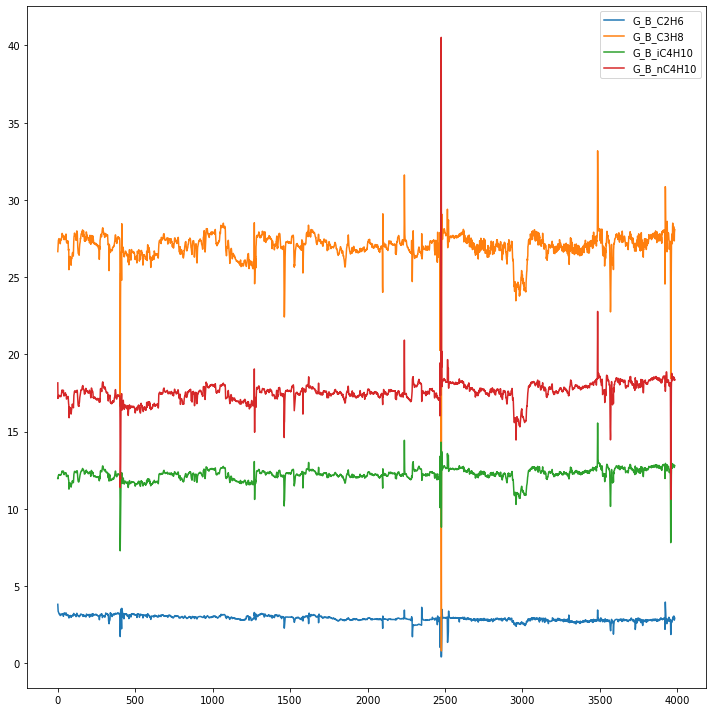

In [343]:
plt.rcParams["figure.figsize"] = (10,10)

test_data[['G_B_C2H6', 'G_B_C3H8','G_B_iC4H10', 'G_B_nC4H10']][:].plot()

# make room for tick labels
plt.tight_layout()


plt.show()

In [344]:
predict = pd.DataFrame()

In [345]:
predict[['timestamp']] = test_data[['timestamp']]

In [346]:
B = pd.DataFrame({'B_C2H6':[],'B_C3H8':[],'B_iC4H10':[], 'B_nC4H10':[]})

In [347]:
for i in range(test_data.shape[0]):
    new_line = {}
    B_C2H6 = test_data.loc[i,'G_B_C2H6'] * 100 / test_data.loc[i,'B_rate']
    B_C3H8 = test_data.loc[i,'G_B_C3H8'] * 100 / test_data.loc[i,'B_rate']
    B_iC4H10 = test_data.loc[i,'G_B_iC4H10'] * 100 / test_data.loc[i,'B_rate']
    B_nC4H10 = test_data.loc[i,'G_B_nC4H10'] * 100 / test_data.loc[i,'B_rate']
    
    new_line.update({'B_C2H6':B_C2H6,'B_C3H8':B_C3H8,'B_iC4H10':B_iC4H10,'B_nC4H10': B_nC4H10})
    B = B.append(new_line, ignore_index=True)

In [348]:
predict = pd.concat([predict,B] , axis=1)

In [349]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-04-30 23:30:00,5.136487,35.860326,16.101509,24.426845
1,2020-05-01 00:00:00,4.772260,36.101581,16.085412,23.089591
2,2020-05-01 00:30:00,4.621152,36.470537,16.271936,23.292283
3,2020-05-01 01:00:00,4.522968,36.902805,16.423886,23.392819
4,2020-05-01 01:30:00,4.511654,37.140003,16.485380,23.418169
...,...,...,...,...,...
3980,2020-07-22 21:30:00,3.885668,36.825173,16.907882,24.526035
3981,2020-07-22 22:00:00,3.705705,36.282279,16.820515,24.525714
3982,2020-07-22 22:30:00,3.770802,37.215391,17.032387,24.500238
3983,2020-07-22 23:00:00,3.850774,37.495206,17.087511,24.502149


In [350]:
predict.drop(0, axis=0, inplace=True)

In [351]:
predict = predict.reset_index(drop=True)

In [352]:
predict

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.772260,36.101581,16.085412,23.089591
1,2020-05-01 00:30:00,4.621152,36.470537,16.271936,23.292283
2,2020-05-01 01:00:00,4.522968,36.902805,16.423886,23.392819
3,2020-05-01 01:30:00,4.511654,37.140003,16.485380,23.418169
4,2020-05-01 02:00:00,4.466667,37.195680,16.517689,23.459039
...,...,...,...,...,...
3979,2020-07-22 21:30:00,3.885668,36.825173,16.907882,24.526035
3980,2020-07-22 22:00:00,3.705705,36.282279,16.820515,24.525714
3981,2020-07-22 22:30:00,3.770802,37.215391,17.032387,24.500238
3982,2020-07-22 23:00:00,3.850774,37.495206,17.087511,24.502149


In [353]:
predict.to_csv('predictSGD_NF.csv', sep=',', header=True, index=False)

In [354]:
a = pd.read_csv('sample_submission.csv', header = 0, sep = ',')
b = pd.read_csv('predictSGD_NF.csv', header = 0, sep = ',')

In [355]:
a

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.363701,37.742757,16.843028,24.171264
1,2020-05-01 00:30:00,4.363701,37.742757,16.843028,24.171264
2,2020-05-01 01:00:00,4.363701,37.742757,16.843028,24.171264
3,2020-05-01 01:30:00,4.363701,37.742757,16.843028,24.171264
4,2020-05-01 02:00:00,4.363701,37.742757,16.843028,24.171264
...,...,...,...,...,...
3979,2020-07-22 21:30:00,4.363701,37.742757,16.843028,24.171264
3980,2020-07-22 22:00:00,4.363701,37.742757,16.843028,24.171264
3981,2020-07-22 22:30:00,4.363701,37.742757,16.843028,24.171264
3982,2020-07-22 23:00:00,4.363701,37.742757,16.843028,24.171264


In [356]:
b

,timestamp,B_C2H6,B_C3H8,B_iC4H10,B_nC4H10
0,2020-05-01 00:00:00,4.772260,36.101581,16.085412,23.089591
1,2020-05-01 00:30:00,4.621152,36.470537,16.271936,23.292283
2,2020-05-01 01:00:00,4.522968,36.902805,16.423886,23.392819
3,2020-05-01 01:30:00,4.511654,37.140003,16.485380,23.418169
4,2020-05-01 02:00:00,4.466667,37.195680,16.517689,23.459039
...,...,...,...,...,...
3979,2020-07-22 21:30:00,3.885668,36.825173,16.907882,24.526035
3980,2020-07-22 22:00:00,3.705705,36.282279,16.820515,24.525714
3981,2020-07-22 22:30:00,3.770802,37.215391,17.032387,24.500238
3982,2020-07-22 23:00:00,3.850774,37.495206,17.087511,24.502149


In [357]:
#test_data.to_excel('123.xlsx')